In [1]:
%%time
# Error mitigation
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs
Wall time: 2.27 s


UC3MAL201 Machine Learning Session 13 Tutorial 13 Leon Eriksen Helgeland -
First written 09.10.2020

# Convolutional Neural Networks (CNN)

#### Table of contents
1. Dataset description
2. Data pre-processing
3. Modelling process
4. Training process
5. Prediction process

## 1. Dataset description

- Size : 28x28 - grayscale - 0/255
- Amount : 70k - split 60/10
- Features : 784 columns
- Class : 1 column - type of cloth material

In [2]:
%%time

# KERAS
from keras.layers import Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model

# SKLEARN
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix

# OTHER
import matplotlib.pyplot as plt
import numpy as np
import random
import glob

# Stop using
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras.optimizers
from matplotlib import pyplot
import pandas as pd

Using TensorFlow backend.
Wall time: 486 ms


## 2. Data pre-processing

In [4]:
%%time
X_train, y_train = pd.read_csv(r'C:\Users\leon.helgeland\Documents\GitHub\Datasets\S05MAL_Session_13\fashion-mnist_train.csv',header='infer').iloc[:,1:].apply(lambda a: a*(0.99/255)+0.01), OneHotEncoder(categories="auto", sparse=False, dtype=np.int16).fit_transform(pd.read_csv(r'C:\Users\leon.helgeland\Documents\GitHub\Datasets\S05MAL_Session_13\fashion-mnist_train.csv',header='infer').iloc[:,:1].to_numpy().reshape(-1, 1))
X_test, y_test = pd.read_csv(r'C:\Users\leon.helgeland\Documents\GitHub\Datasets\S05MAL_Session_13\fashion-mnist_test.csv',header='infer').iloc[:,1:].apply(lambda a: a*(0.99/255)+0.01), OneHotEncoder(categories="auto", sparse=False, dtype=np.int16).fit_transform(pd.read_csv(r'C:\Users\leon.helgeland\Documents\GitHub\Datasets\S05MAL_Session_13\fashion-mnist_test.csv',header='infer').iloc[:,:1].to_numpy().reshape(-1, 1))

Wall time: 7.51 s


In [5]:
# need to rehape since img
X_train = X_train.to_numpy().reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.to_numpy().reshape((X_test.shape[0], 28, 28, 1))

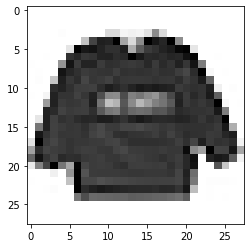

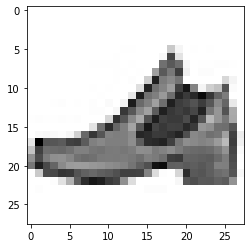

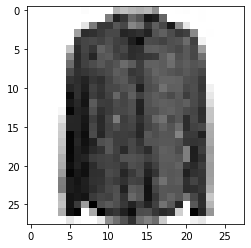

In [6]:
for i in range(3):
    img = X_train[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

## 3. Modelling process

In [7]:
def model_name(modeldirpath_,config_):
    '''
    This function builds the NN model save name and full path.
    '''
    max_ = 0
    for i in glob.glob(f'{modeldirpath_}\*.tf'):
        num = int(i[-6]+i[-5]+i[-4])
        if num > max_:
            max_ = num
    max_ = max_+1
    conf_build = ''
    for i in config_:
        conf_build += str(i)+'-'
    filename = f'{modeldirpath_}\cnn-model-{conf_build}{max_:03d}.tf'
    return filename

In [8]:
%%time
def model_fit(X_train, y_train, config, savepath):
    '''
    Define model.
    '''
    epoch = config[0]
    init_LR = config[1]
    batch = config[2]
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)) ) # Filters normal: 25,32 ++ (kfold)
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) # Kernel size is filter size - stride=1 is standard, specify if you want something else. If you have two conv layers after each other the filter amount must be double in the next layer.
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())          
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    opt = Adam(lr=init_LR, decay=init_LR / epoch)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epoch, batch_size=batch, validation_split=0.20, workers=3)
    
    # Saving the model
    model.save(model_name(savepath,config))
    return model

Wall time: 0 ns


## 4. Training process

In [ ]:
# 100, 1e-4, 16 : loss: 0.0458 - accuracy: 0.9831 - val_loss: 0.3160 - val_accuracy: 0.9323 # Prediction: 0.9355000257492065
# 10, 1e-4, 100# Prediction: 0.8974999785423279
# 10, 1e-4, 16 : loss: 0.2607 - accuracy: 0.9064 - val_loss: 0.2485 - val_accuracy: 0.9123 # Prediction: 0.9125999808311462

In [9]:
%%time
# Training
save_model_folder_path = r'C:\Users\leon.helgeland\Documents\GitHub\Models\S05MAL_Session_13_model'
config = [10, 1e-4, 16]#16] # Epoch, inital_learning_rate, batch_size
neural_network = model_fit(X_train, y_train, config, save_model_folder_path)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 331us/step - loss: 0.6869 - accuracy: 0.7581 - val_loss: 0.4174 - val_accuracy: 0.8554
Epoch 2/10
48000/48000 [==============================] - 15s 309us/step - loss: 0.4524 - accuracy: 0.8410 - val_loss: 0.3529 - val_accuracy: 0.8752
Epoch 3/10
48000/48000 [==============================] - 15s 312us/step - loss: 0.3883 - accuracy: 0.8627 - val_loss: 0.3206 - val_accuracy: 0.8875
Epoch 4/10
48000/48000 [==============================] - 15s 313us/step - loss: 0.3551 - accuracy: 0.8754 - val_loss: 0.2986 - val_accuracy: 0.8954
Epoch 5/10
48000/48000 [==============================] - 15s 312us/step - loss: 0.3315 - accuracy: 0.8844 - val_loss: 0.2854 - val_accuracy: 0.9003
Epoch 6/10
48000/48000 [==============================] - 15s 307us/step - loss: 0.3117 - accuracy: 0.8890 - val_loss: 0.2776 - val_accuracy: 0.9031
Epoch 7/10
48000/48000 [==============================] 

In [10]:
%%time
neural_network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

## 5. Prediction proces

In [17]:
# 
load_model_selection = 'cnn-model-100-0.0001-16-003.tf'
path_load = r'C:\Users\leon.helgeland\Documents\GitHub\Models\S05MAL_Session_13_model' 
neural_network_loaded = load_model(f'{path_load}\{load_model_selection}')
neural_network_loaded.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               921700    
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)              

In [18]:
# Enable loaded model
neural_network = neural_network_loaded

In [19]:
%%time
Pred_class = neural_network.predict_classes(X_test)
(eval_loss, eval_accuracy) = neural_network.evaluate(X_test,y_test, batch_size=16, verbose=1)
eval_accuracy

10000/10000 [==============================] - 1s 123us/step
Wall time: 1.83 s


0.9355000257492065

# Testing

In [ ]:
%%time
# Make predictions - Use the model to generate predictions on new data by calling functions such as evaluate() or predict() on the model.

# predict with the fit model
def model_predict(model, testdata):
    Prediction = model.predict(testdata, verbose=0)
    return Prediction

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
%%time
def model_fit(X_train, y_train, config, savepath):
    '''
    Define model.
    '''
    epoch = config[0]
    init_LR = config[1]
    batch = config[2]
    
    model = Sequential()

    # Convolutional and maxPooling
    # Input: 1 x 28 x 28
    model.add(Convolution2D( 25,3,3, input_shape=(28,28,1)) )
    # C1: 25 x 26 x 26
    model.add(MaxPooling2D(( 2,2 )))
    # M1: 25 x 13 x 13
    model.add(Convolution2D( 50,3,3 ))
    # C2: 50 x 11 x 11
    model.add(MaxPooling2D(( 2,2 )))
    # M2: 50 x 5 x 5
    model.add(Flatten())
    # F: 1250

    # Fully connected feedforward network
    model.add(Dense(output_dim=100))
    model.add(Activation('relu'))
    model.add(Dense(output_dim=10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epoch, batch_size=batch, use_multiprocessing=True, workers=8)
    
    # Saving the model
    Model.save(model_name(savepath,config))
    return model

In [ ]:

modeldirpathx = r'C:\Users\leon.helgeland\Documents\GitHub\Models\S05MAL_Session_13_model'
#for i in glob.glob(f'{modeldirpathx}\*.tf'):
#    print(i, type(i), (int(i[-6]+i[-5]+i[-4])+1), type(i[-6]+i[-5]+i[-4]))
modelname = model_name(modeldirpathx, configx)
print(modelname)

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break